# Tree-Based Methods

Author: **Duncan Kirby**

Adapted from The Elements of Statistical Learning by Hastie et al.


In [11]:
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = (8,6)

## Overview

Tree-based methods generally try to partition the feature space and then fit a simple model (such as a constant) in each part. There are several standard packages for regression of tree-based models, including a package from scikit-learn.

## Regression Method
Fitting the function in each segment of feature space is straightforward, and is usually very easy since we choose simple models. The difficult part is deciding where to place the decision boundaries. In fact, finding a least-squares-error minimum binary decision boundary (ie. only two regions of feature space) is often computationally unfeasible!

One approach is to use a greedy algorithm. The procedure is as follows:
1. Define a pair of half-planes $$R_{1}(j,s)=\{X|X_{j}\leq s\}\\ R_{2}(j,s)=\{X|X_{j}\gt s\}$$

We search for the best feature $j$ and split point $s$ to minimize least-squares error, ie.:
$$ min_{j,s}[ min_{f1}[ \Sigma_{x_i \in R_{1}}(y_{i}-f1)^{2}] + min_{f2}[\Sigma_{x_i \in R_{2}}(y_{i}-f2)^{2}]]$$

Note that if we are just fitting constants (often this is the case) then the inner minimizations are already known; the average of $x_{i} \in R_{i}$.

2. Repeat this procedure on each of the subregions we just fit.
3. Repeat steps 1 and 2 until $T_0$ nodes have been added to the tree. The choice of $T_0$ is a hyperparameter that requires tuning.
4. Perform cost-complexity pruning. To do this we must define a few terms.

$\textit{Pruning}$ a tree means collapsing any number of its non-terminal nodes. This means replacing those terminal nodes by a single node (the new node is chosen by the same method that built the original tree).

A $\textit{subtree}$ is $T \subset T_0$ that can be obtained by pruning $T_0$.

To perform cost-complexity pruning we eliminate the subtree so as to minimize the complexity criterion (looks like a regularized least squares)  

$C_{\alpha}(T) = \text{(Sum of Square Errors over sub-tree)} + \alpha \text{(Number of Terminal Nodes)}$

where $\alpha$ is a hyperparameter to tune. We perform a sequence of prunings and choose the optimal model as per the complexity criterion.

## Example implementation in Python

(0.0, 7.88, -0.9, 3.4800000000000044)

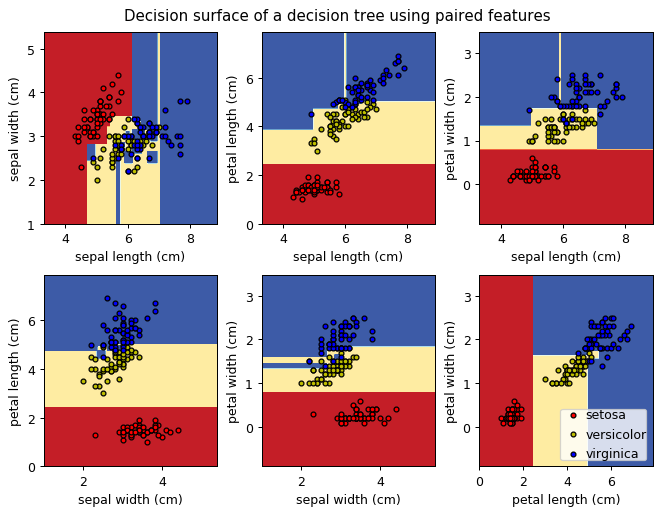

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
